In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['siim-train-test', 'siim-acr-pneumothorax-segmentation']


# Purpose

Show the **full** dataset. This format might be easier and more accesible for participants. Have fun!

In [2]:
# Show some images
from glob import glob
train_fns = sorted(glob('../input/siim-train-test/siim/dicom-images-train/*/*/*.dcm'))
test_fns = sorted(glob('../input/siim-train-test/siim/dicom-images-test/*/*/*.dcm'))

print(len(train_fns))
print(len(test_fns))

10712
1377


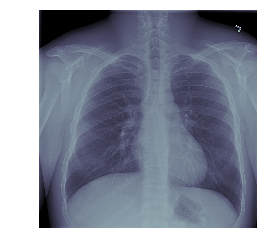

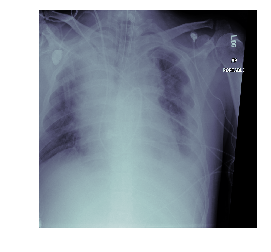

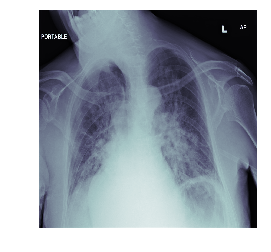

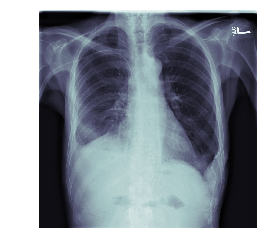

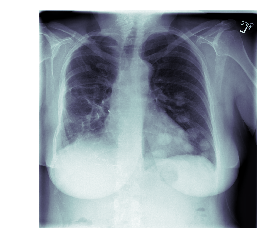

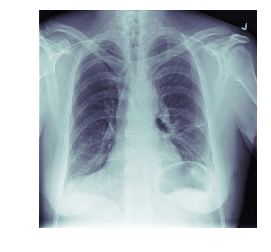

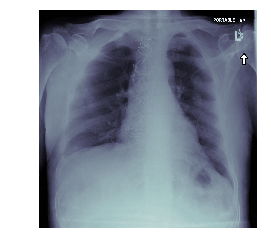

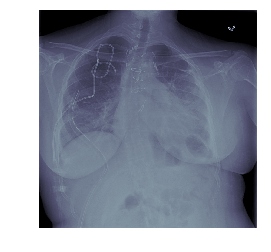

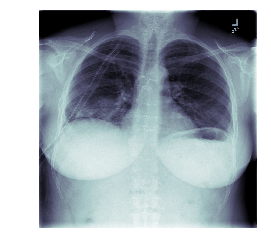

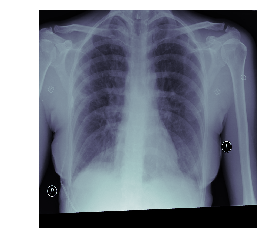

In [3]:
# show some images
from matplotlib import pyplot as plt
import pydicom

for k in range(10):
    fn = np.random.choice(test_fns)
    img = pydicom.read_file(fn).pixel_array
    plt.imshow(img, cmap='bone')
    plt.axis('off')
    plt.show()

In [4]:
# load rle-encoded masks
import pandas as pd
from collections import defaultdict
rles = pd.read_csv('../input/siim-train-test/siim/train-rle.csv')
# images can have multiple annotations
rles_ = defaultdict(list)
for image_id, rle in zip(rles['ImageId'], rles[' EncodedPixels']):
    rles_[image_id].append(rle)
rles = rles_
annotated = {k: v for k, v in rles.items() if v[0] != ' -1'}
print("%d of %d images are annotated" % (len(annotated), len(rles)))

2379 of 10675 images are annotated


In [5]:
print("Missing: ", len(train_fns) - len(rles))
# This was discussed here: https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation/discussion/96993#latest-560352

Missing:  37


In [6]:
# check the test images
means = []
from tqdm import tqdm_notebook as tqdm
for fn in tqdm(test_fns):
    img = pydicom.read_file(fn).pixel_array
    means.append(img.mean())
print("Test mean: ", np.mean(means))


Test mean:  124.68802690055809


In [7]:
# check the train images
means = []
for fn in tqdm(train_fns):
    img = pydicom.read_file(fn).pixel_array
    means.append(img.mean())
print("Train mean: ", np.mean(means))


Train mean:  125.08241941378667
